<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Task5" data-toc-modified-id="Task5-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Task5</a></span></li></ul></div>

# Task5

В предыдущем задании вы визуализировали распределение, вручную группируя значения с помощью библиотеки Pandas. Было бы полезно как-то автоматизировать эту задачу? Нет ничего проще.
Но для этого нам нужно использовать другой тип визуализации данных — гистограмму. На этот раз вместо средних значений мы будем использовать абсолютные значения числа коммитов и сравним их в рабочие и выходные дни.
Выполните необходимые шаги по созданию следующего графика:

1.   Анализируйте только пользователей, а не администраторов.
2. Используйте фильтр status = 'ready' для коммитов.
3. Создайте два списка значений (для рабочих дней и для выходных) в качестве входных данных для гистограммы.
4. Размер figsize остается прежним; размер шрифта и цветовую палитру выбирайте по своему вкусу.
5. Используйте уровень прозрачности 0,7 для переднего слоя гистограммы.
6. В конце Jupyter Notebook создайте markdown-ячейку и вставьте вопрос: «Существуют ли часы, когда общее количество коммитов было выше в выходные дни, чем в рабочие?». В своем ответе приведите примеры с 4 наибольшими значениями.

In [1]:
import sqlite3   #импорт библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from datetime import date
import calendar

In [2]:
# from google.colab import drive   #подключаем диск
# drive.mount('/content/drive', force_remount=True)

In [3]:
data = sqlite3.connect('../data/checking-logs.sqlite') #соединились с базой данных с помощью библиотеки sqlite3

In [4]:
sql1 = '''
SELECT * FROM checker
WHERE (uid LIKE "user_%") AND (status='ready')
'''
pd.read_sql(sql1, data, parse_dates='timestamp')


,index,status,success,timestamp,numTrials,labname,uid
0,7,ready,0,2020-04-17 05:19:02.744528,1,project1,user_4
1,9,ready,1,2020-04-17 05:22:45.549397,2,project1,user_4
2,11,ready,1,2020-04-17 05:34:24.422370,3,project1,user_4
3,13,ready,0,2020-04-17 05:43:27.773992,4,project1,user_4
4,15,ready,1,2020-04-17 05:46:32.275104,5,project1,user_4
...,...,...,...,...,...,...,...
1681,3393,ready,1,2020-05-21 20:01:48.959966,9,laba06s,user_19
1682,3395,ready,0,2020-05-21 20:18:54.487900,6,laba06s,user_1
1683,3397,ready,0,2020-05-21 20:19:06.872761,7,laba06s,user_1
1684,3399,ready,0,2020-05-21 20:22:41.877806,8,laba06s,user_1


In [5]:
sql1 = '''
SELECT timestamp FROM checker
WHERE (uid LIKE "user_%") AND (status='ready')
'''
hourly_commits = pd.read_sql(sql1, data, parse_dates='timestamp')
hourly_commits['day'] = hourly_commits.timestamp.dt.weekday
hourly_commits['hour'] = hourly_commits.timestamp.dt.hour
hourly_commits['is_weekend'] = hourly_commits.day.apply(lambda x: 'weekend' if x > 4 else 'weekday')
hourly_commits

,timestamp,day,hour,is_weekend
0,2020-04-17 05:19:02.744528,4,5,weekday
1,2020-04-17 05:22:45.549397,4,5,weekday
2,2020-04-17 05:34:24.422370,4,5,weekday
3,2020-04-17 05:43:27.773992,4,5,weekday
4,2020-04-17 05:46:32.275104,4,5,weekday
...,...,...,...,...
1681,2020-05-21 20:01:48.959966,3,20,weekday
1682,2020-05-21 20:18:54.487900,3,20,weekday
1683,2020-05-21 20:19:06.872761,3,20,weekday
1684,2020-05-21 20:22:41.877806,3,20,weekday


In [6]:
weekday_commits = hourly_commits.query('is_weekend == "weekday"').hour.to_list()  #создали список значений для рабочих дней
len(weekday_commits)

1059

In [7]:
weekend_commits = hourly_commits.query('is_weekend == "weekend"').hour.to_list() #создали список значений для выходных
len(weekend_commits)

627

строим гистограмму

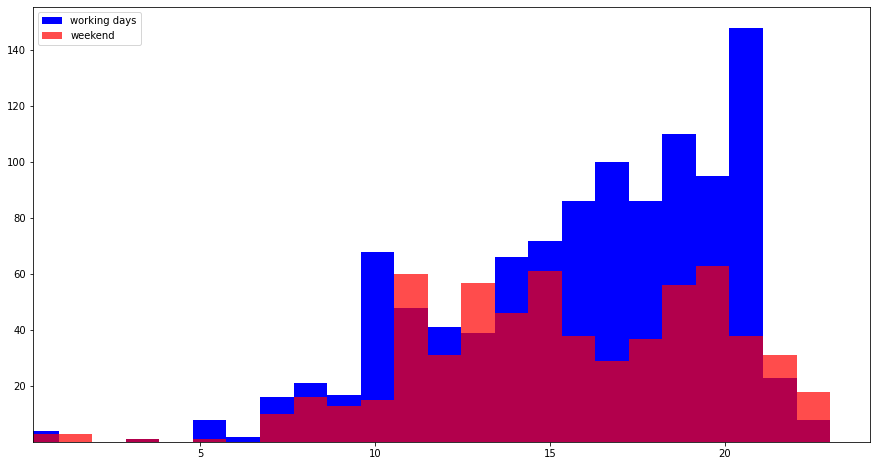

In [14]:
fig, abc = plt.subplots(figsize = (15, 8))
abc.hist(weekday_commits, bins=24, color='blue', label='working days')
abc.hist(weekend_commits, bins=24, color='red', alpha=.7, label='weekend')
plt.xlim(0.23)
plt.ylim(0.155)
abc.legend()

In [9]:
data.close()

Найдем 4 (наибольших по значению коммитов) часа, когда общее количество коммитов было выше в выходные дни, чем в рабочие

In [10]:
answer = hourly_commits.groupby(['hour', 'is_weekend'], as_index=False)\
    .agg({'timestamp': 'count'})\
    .rename(columns={'timestamp': 'submits'})\
    .pivot(index='hour', columns='is_weekend', values='submits')\
    .fillna(0)\
    .query('weekend > weekday')\
    .sort_values(by='weekend', axis=0, ascending=False)\
    .reset_index()\
    .iloc[0:4, [0, 2]]
answer

is_weekend,hour,weekend
0,11,60.0
1,13,57.0
2,22,31.0
3,23,18.0


да

11, 13, 22, 23